## Machine Learning with Iris


### Import libraries

In [1]:

from sklearn.linear_model import LogisticRegression 

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm

from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier


import pandas as pd

import numpy as np

import seaborn as sns
sns.set(style = "white", color_codes = True)

import matplotlib.pyplot as plt

%matplotlib inline




### Reading the dataset

In [2]:
iris = pd.read_csv("Iris.csv")
iris.head(10)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


### Id column unneeded and drop

In [6]:
iris.drop('Id', axis=1, inplace=True)

In [7]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


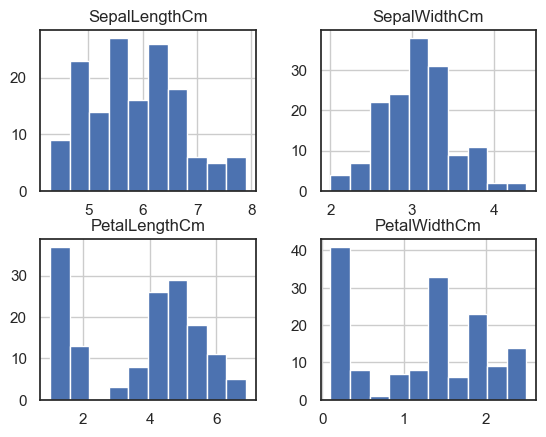

In [8]:
iris.hist()
plt.show()



### We can see the relationship between Petal length and width and Sepal length and width on the graph.

Text(0.5, 1.0, 'Petal Length VS Width')

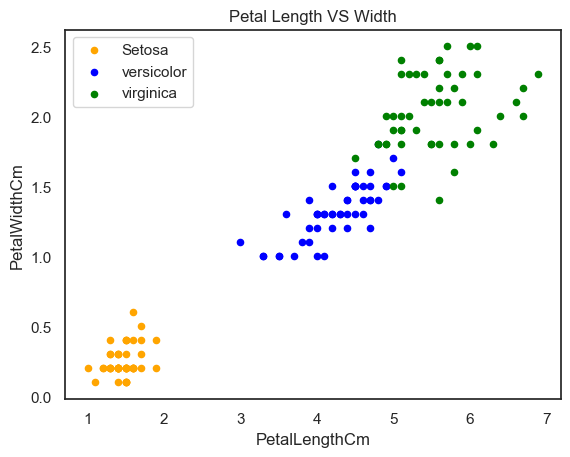

In [9]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Setosa')

iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)

iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)

fig.set_title('Petal Length VS Width')



Text(0.5, 1.0, 'Sepal Length VS Width')

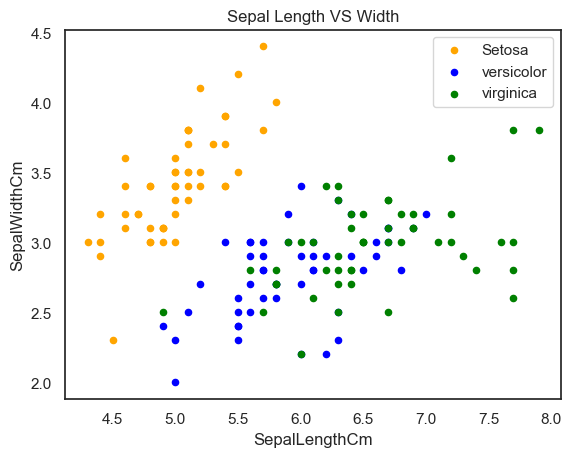

In [10]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')

iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)

iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)

fig.set_title('Sepal Length VS Width')

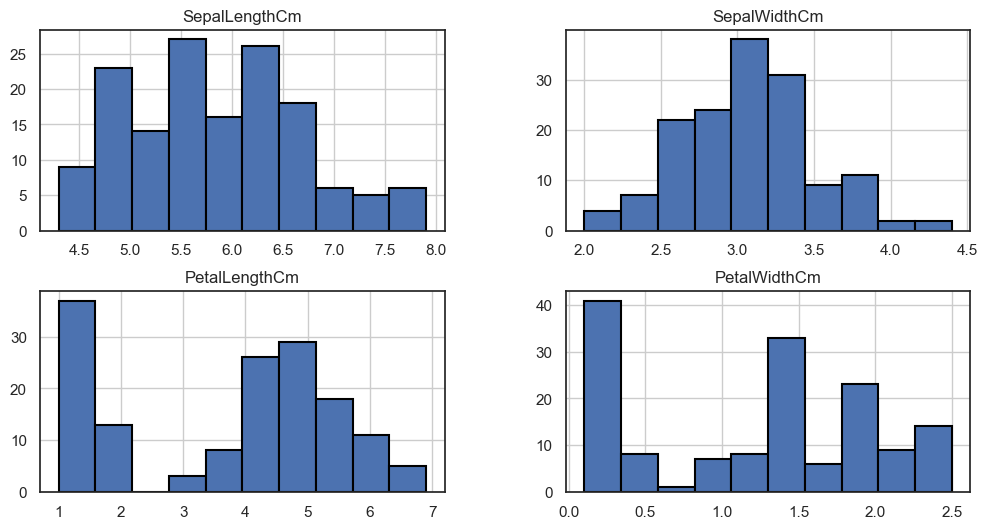

In [11]:
iris.hist(edgecolor='black', linewidth=1.5)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [12]:
iris.shape

(150, 5)

In [13]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\IRAN\AppData\Local\Temp\ipykernel_7876\1931444603.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(), annot=True,cmap='cubehelix_r')


<Axes: >

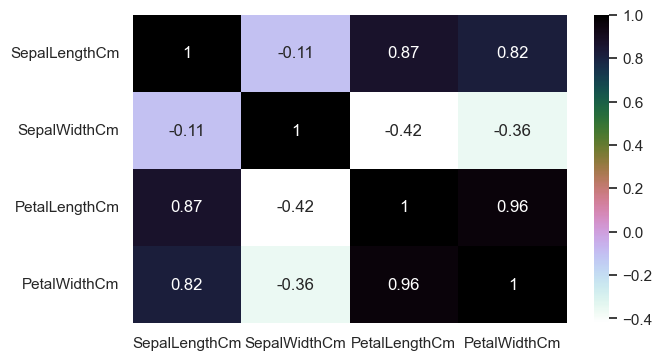

In [14]:
plt.figure(figsize=(7,4))
sns.heatmap(iris.corr(), annot=True,cmap='cubehelix_r')

In [15]:
train, test = train_test_split(iris, test_size = 0.3)

print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [16]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

train_Y = train.Species

test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

test_Y = test.Species


In [17]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
149,5.9,3.0,5.1,1.8
27,5.2,3.5,1.5,0.2
101,5.8,2.7,5.1,1.9
136,6.3,3.4,5.6,2.4
130,7.4,2.8,6.1,1.9


test_X.head()

In [18]:
train_Y.head()

149    Iris-virginica
27        Iris-setosa
101    Iris-virginica
136    Iris-virginica
130    Iris-virginica
Name: Species, dtype: object



### Support Vector Mechine

In [19]:
model = svm.SVC()
model.fit(train_X, train_Y)

prediction = model.predict(test_X)

print('the accuracy of svm id :', metrics.accuracy_score(prediction, test_Y) )

the accuracy of svm id : 0.9333333333333333





### LogisticRegression

In [20]:
logis_model = LogisticRegression()

logis_model.fit(train_X, train_Y)

logis_prediction = logis_model.predict(test_X)

print('the accuracy of logisticRegression is :', metrics.accuracy_score(logis_prediction, test_Y) )

the accuracy of logisticRegression is : 0.9333333333333333





### Decision Tree

In [21]:
dtree_model = DecisionTreeClassifier()

dtree_model.fit(train_X, train_Y)

dtree_prediction = dtree_model.predict(test_X)

print('the accuracy of decisionTree is :', metrics.accuracy_score(dtree_prediction, test_Y) )

the accuracy of decisionTree is : 0.8666666666666667





### K-Nearest Neighbour

In [22]:
knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(train_X, train_Y)

knn_prediction = knn_model.predict(test_X)

print('the accuracy of KNN is : ', metrics.accuracy_score(knn_prediction, test_Y))

the accuracy of KNN is :  0.9111111111111111



#### Let's check the accuracy for various values of n for K-Nearest nerighbours

C:\Users\IRAN\AppData\Local\Temp\ipykernel_7876\1546381019.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()
C:\Users\IRAN\AppData\Local\Temp\ipykernel_7876\1546381019.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(metrics.accuracy_score(knnn_prediction,test_Y)))
C:\Users\IRAN\AppData\Local\Temp\ipykernel_7876\1546381019.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(metrics.accuracy_score(knnn_prediction,test_Y)))
C:\Users\IRAN\AppData\Local\Temp\ipykernel_7876\1546381019.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.S

([<matplotlib.axis.XTick at 0x212b817ac50>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

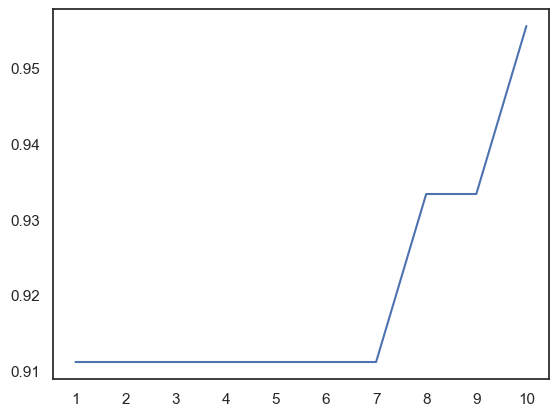

In [23]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    knnn_model=KNeighborsClassifier(n_neighbors=i) 
    knnn_model.fit(train_X,train_Y)
    knnn_prediction=knnn_model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(knnn_prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)




### We used all the features of iris in above models. Now we will use Petals and Sepals Seperately


### Creating Petals And Sepals Training Data


In [24]:
petal = iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal = iris[['SepalLengthCm','SepalWidthCm','Species']]

train_p, test_p = train_test_split(petal, test_size=0.3, random_state=0)

train_x_p = train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p = train_p.Species

test_x_p = test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p = test_p.Species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species





### SVM

In [25]:
model = svm.SVC()
model.fit(train_x_p, train_y_p)
predictions = model.predict(test_x_p)
print('The accuracy of the SVM using Petals is:', metrics.accuracy_score(predictions, test_y_p))



model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8




### Logistic Regression

In [26]:
model = LogisticRegression()
model.fit(train_x_p, train_y_p)
prediction = model.predict(test_x_p)

print('The accuracy of the Logistic Regression using Petals is:' ,metrics.accuracy_score(prediction,test_y_p))


model.fit(train_x_s, train_y_s)
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))


The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222




### Decision Tree

In [27]:
model = DecisionTreeClassifier()
model.fit(train_x_p, train_y_p)
prediction = model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Sepals is:' ,metrics.accuracy_score(prediction,test_y_s))


model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Sepals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666




 ### K-nearest Neighbours

In [28]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_x_p, train_y_p)
prediction = model.predict(test_x_p)
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))


model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))


The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333




###  Observations:

#### Using Petals over Sepal for training the data gives a much better accuracy.
#### This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low
#### whereas the correlation between Petal Width and Length was very high.